In [3]:
import os
import pandas as pd

# Define the path to the dataset folder
dataset_path = r"C:\Users\Administrator\Desktop\FinalProject\dataset"

# List all CSV files in the dataset directory
file_list = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store all the Benzo(a)pyrene data
benzo_data = pd.DataFrame()

# Loop through all files
for file in file_list:
    file_path = os.path.join(dataset_path, file)
    
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract year from the file name (assuming the year is the two digits after 'd')
    year = int(file[1:3]) + 2000  # Assuming the year is represented by 'dXX_v3.csv'
    
    # Filter rows where 'SUBSTANCE NAME' is 'Benzo(a)pyrene'
    benzo_subset = df[df['SUBSTANCE NAME'] == 'Benzo(a)pyrene']
    
    # Add a new column 'Year' with the corresponding year
    benzo_subset['Year'] = year
    
    # Append the filtered data to the combined DataFrame
    benzo_data = pd.concat([benzo_data, benzo_subset])

# Save the filtered data with the Year column to a new CSV file
output_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
benzo_data.to_csv(output_path, index=False)

# Optionally, print the first few rows of the final filtered data
print(benzo_data.head())

# Print the location where the final CSV file is saved
print(f"Filtered data saved to: {output_path}")


   AUTHORISATION ID / PERMIT ID       PRIMARY INDUSTRY ACTIVITY DESCRIPTION  \
5                  T/48/12074/R                                         NaN   
8                  T/64/45170/R                                         NaN   
9                  T/53/45014/R                                         NaN   
14                   AWNNF13399                                         NaN   
19                     LP3533LJ  LOADING/STORAGE/TREATMENT ETC OF CRUDE OIL   

                           OPERATOR NAME  \
5                 SEVERN TRENT WATER LTD   
8                 SEVERN TRENT WATER LTD   
9                 SEVERN TRENT WATER LTD   
14                         Anglian Water   
19  Crude Oil Terminals (Humber) Limited   

                                         SITE ADDRESS SITE POSTCODE   EASTING  \
5   Derby Sewage Treatment Works Chp Plant Megalou...      DE21 7BR  438830.0   
8                       Stoke Bardolph STW Nottingham      NG14 5HL  464730.0   
9   Wanlip Sewage

E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 不同年份的排放情况

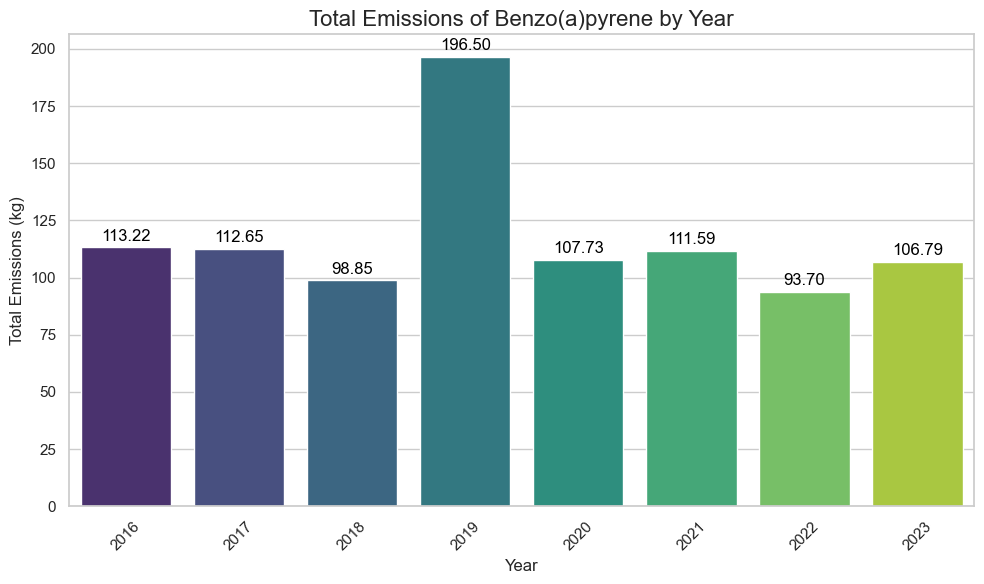

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset folder
dataset_path = r"C:\Users\Administrator\Desktop\FinalProject\dataset"

# Load the dataset
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# Group by 'Year' and sum the 'QUANTITY RELEASED (kg)'
yearly_emissions = data.groupby('Year')['QUANTITY RELEASED (kg)'].sum().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='QUANTITY RELEASED (kg)', data=yearly_emissions, palette="viridis")

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Customize the plot with titles and labels
plt.title('Total Emissions of Benzo(a)pyrene by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Trend Analysis Over Time

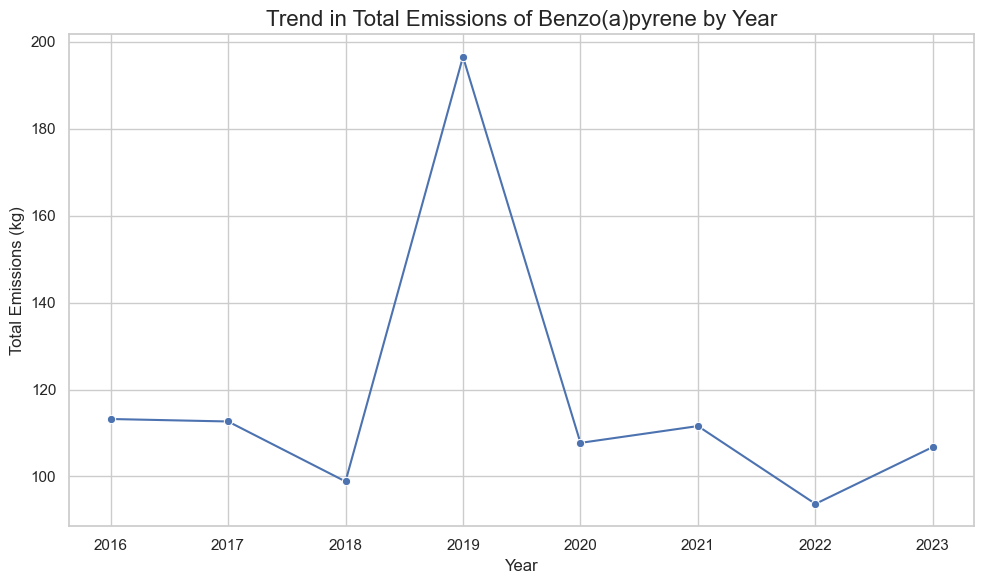

In [6]:
# Create a line plot to visualize the trend in emissions over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='QUANTITY RELEASED (kg)', data=yearly_emissions, marker='o', color='b')

# Customize the plot with titles and labels
plt.title('Trend in Total Emissions of Benzo(a)pyrene by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# Year-over-Year Percentage Change

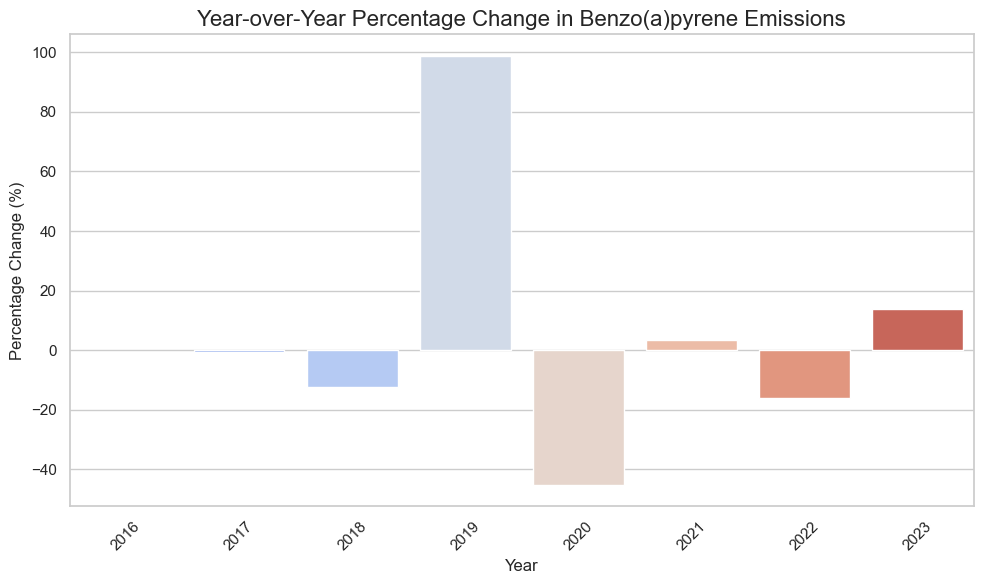

In [7]:
# Calculate year-over-year percentage change
yearly_emissions['YoY Change (%)'] = yearly_emissions['QUANTITY RELEASED (kg)'].pct_change() * 100

# Plot the YoY change
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='YoY Change (%)', data=yearly_emissions, palette="coolwarm")

# Customize the plot with titles and labels
plt.title('Year-over-Year Percentage Change in Benzo(a)pyrene Emissions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Correlation with Industry Sector

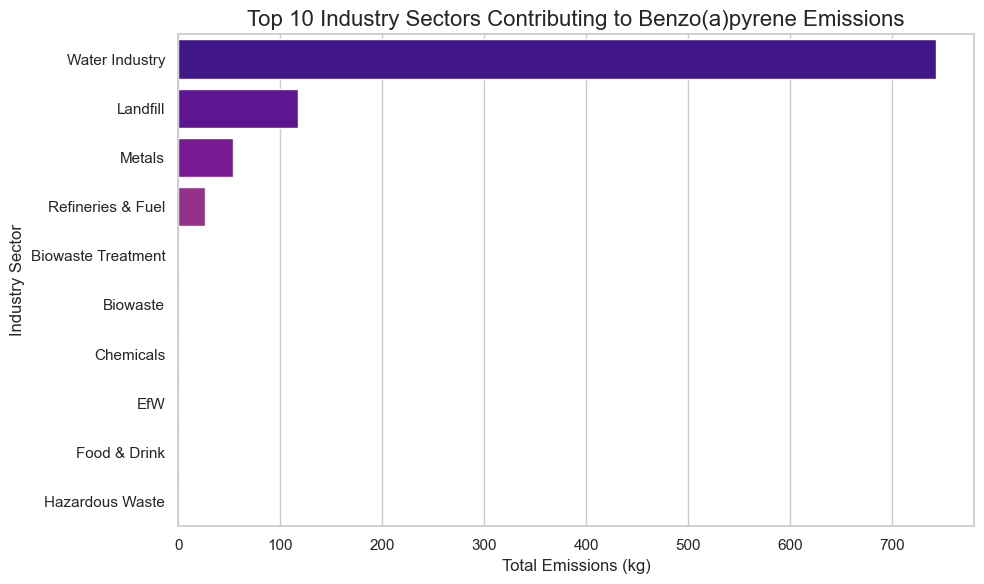

In [8]:
# Group by industry sector and sum the emissions
sector_emissions = data.groupby('REGULATED INDUSTRY SECTOR')['QUANTITY RELEASED (kg)'].sum().reset_index()

# Sort and visualize the top 10 sectors contributing to the most emissions
sector_emissions = sector_emissions.sort_values(by='QUANTITY RELEASED (kg)', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='QUANTITY RELEASED (kg)', y='REGULATED INDUSTRY SECTOR', data=sector_emissions, palette="plasma")

# Customize the plot with titles and labels
plt.title('Top 10 Industry Sectors Contributing to Benzo(a)pyrene Emissions', fontsize=16)
plt.xlabel('Total Emissions (kg)', fontsize=12)
plt.ylabel('Industry Sector', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# Emissions by Region

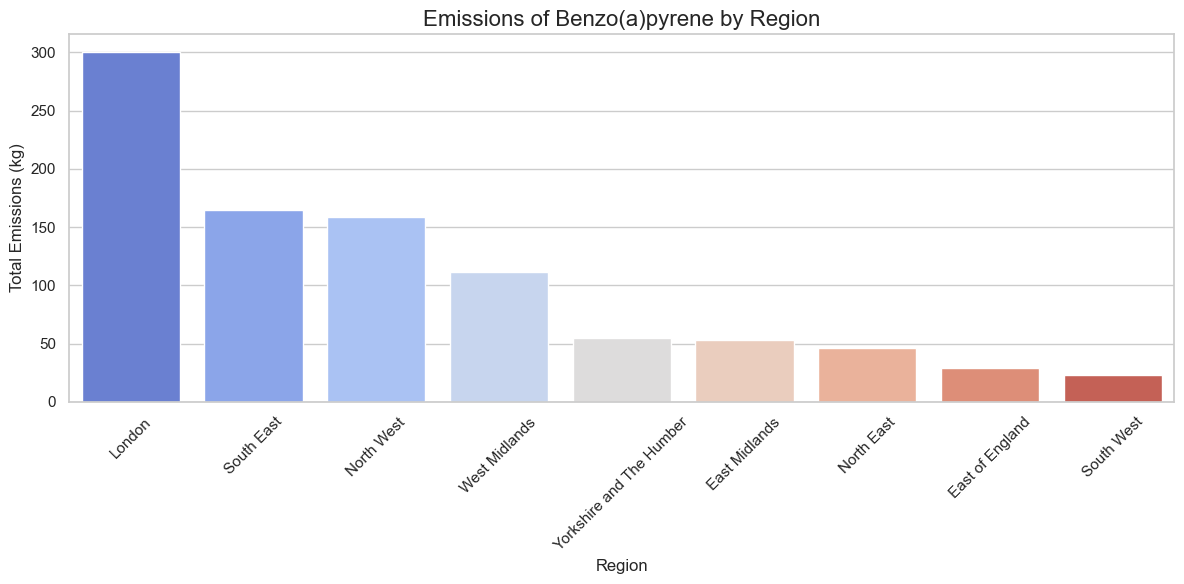

In [12]:
# Group by region and sum the emissions
region_emissions = data.groupby('REGION')['QUANTITY RELEASED (kg)'].sum().reset_index()

# Sort regions by total emissions
region_emissions = region_emissions.sort_values(by='QUANTITY RELEASED (kg)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='REGION', y='QUANTITY RELEASED (kg)', data=region_emissions, palette="coolwarm")

# Customize the plot with titles and labels
plt.title('Emissions of Benzo(a)pyrene by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# Filter data for Benzo(a)pyrene
benzo_data = data[data['SUBSTANCE NAME'] == 'Benzo(a)pyrene']

# Select relevant columns: Latitude, Longitude, and Quantity Released
heat_data = benzo_data[['Latitude', 'Longitude', 'QUANTITY RELEASED (kg)']]

# Create a map centered around the UK (You can adjust this to your region of interest)
map_center = [53.0, -1.5]  # Coordinates for the UK
m = folium.Map(location=map_center, zoom_start=6)

# Prepare the heatmap data (coordinates and intensity values)
heat_data_points = [[row['Latitude'], row['Longitude'], row['QUANTITY RELEASED (kg)']] for index, row in heat_data.iterrows()]

# Add heatmap layer to the map
HeatMap(heat_data_points, radius=15, blur=10, max_zoom=13).add_to(m)

# Save the map to an HTML file
output_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_heatmap.html"
m.save(output_path)

print(f"Heatmap saved to: {output_path}")


Heatmap saved to: C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_heatmap.html
